In [1]:
import os
os.chdir('../src/')
from twitter_scraper import settings

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

users_df = pd.read_csv(settings.USERS_CSV)
nodes_df = pd.read_csv(settings.NODES_CSV)
tweets_df = pd.read_csv(settings.TWEETS_CSV, low_memory=False)
edges_df = pd.read_csv(settings.EDGES_FOLLOWERS_CSV)

In [3]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27976 entries, 0 to 27975
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           27976 non-null  int64 
 1   user_id_str       27976 non-null  int64 
 2   name              27972 non-null  object
 3   screen_name       27976 non-null  object
 4   location          27976 non-null  object
 5   description       21870 non-null  object
 6   protected         27976 non-null  bool  
 7   verified          27976 non-null  bool  
 8   followers_count   27976 non-null  int64 
 9   friends_count     27976 non-null  int64 
 10  listed_count      27976 non-null  int64 
 11  favourites_count  27976 non-null  int64 
 12  statuses_count    27976 non-null  int64 
 13  created_at        27976 non-null  object
 14  is_croatian       27976 non-null  bool  
 15  clean_location    27976 non-null  object
dtypes: bool(3), int64(7), object(6)
memory usage: 2.9+ MB


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1703626 entries, 0 to 1703625
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   id                         int64  
 1   user_id                    int64  
 2   full_text                  object 
 3   created_at                 object 
 4   hashtags                   object 
 5   user_mentions              object 
 6   retweet_user               float64
 7   in_reply_to_status_id_str  float64
 8   in_reply_to_user_id_str    float64
 9   in_reply_to_screen_name    object 
 10  geo                        object 
 11  coordinates                object 
 12  retweet_count              int64  
 13  favorite_count             int64  
 14  week                       object 
 15  month                      object 
 16  is_covid                   bool   
dtypes: bool(1), float64(3), int64(4), object(9)
memory usage: 209.6+ MB


In [6]:
nodes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8808 entries, 0 to 8807
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           8808 non-null   int64  
 1   user_id_str       8808 non-null   int64  
 2   followers_count   8808 non-null   int64  
 3   friends_count     8808 non-null   int64  
 4   listed_count      8808 non-null   int64  
 5   favourites_count  8808 non-null   int64  
 6   statuses_count    8808 non-null   int64  
 7   total_tweets      8808 non-null   int64  
 8   covid_tweets      8808 non-null   int64  
 9   covid_pct         8808 non-null   float64
 10  is_covid          8808 non-null   bool   
dtypes: bool(1), float64(1), int64(9)
memory usage: 696.9 KB


In [7]:
nodes_df.groupby('is_covid').size()

is_covid
False    5138
True     3670
dtype: int64

In [8]:
tweets_df.groupby('is_covid').size()

is_covid
False    1633232
True       70394
dtype: int64

In [12]:
len(edges_df)

319845

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


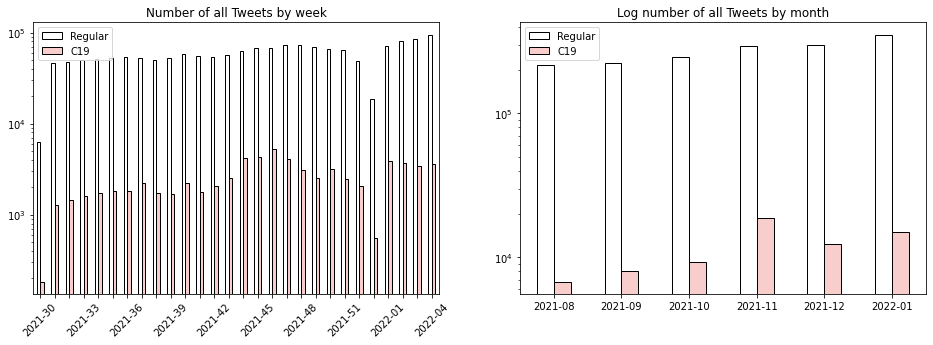

In [45]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'week']).size().unstack('is_covid') \
    .plot.bar(
        title="Number of all Tweets by week", 
        rot=45,
        ax=ax[0],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[0].legend(['Regular', 'C19'])
ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()


KeyError: 'week'

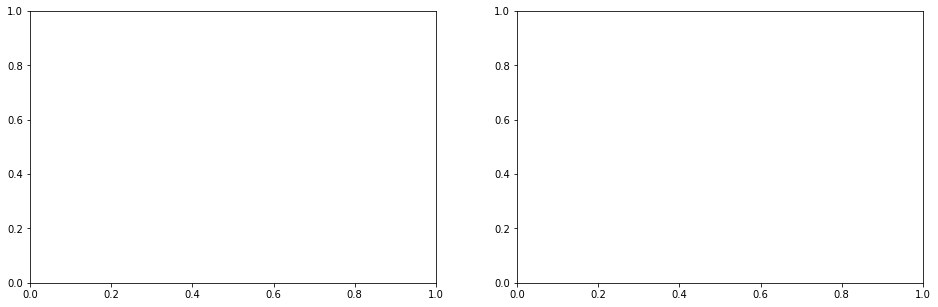

In [46]:


fig, ax = plt.subplots(ncols=2, figsize=(16, 5))
fig.set_facecolor('white')

gdf = nodes_df.groupby(['is_covid', 'week']).size().unstack('week')
gdf[['is_covid']].plot(kind='bar', stacked=True)

plt1_df = tweets_df[tweets_df['is_covid'] == False].groupby(['is_covid', 'week']).size().reset_index(name='size')
ax[0].bar(tweets_df.index, plt1_df['size'], label='Non-Covid', log=True,
    title="Number of all Tweets by week", 
    rot=45,
    color=['#ffffff', '#f8cecc'],
    edgecolor='black'
)

ax[0].legend(['Regular', 'C19'])

ax[0].set_xlabel(None)
for i, t in enumerate(ax[0].get_xticklabels()):
    if (i % 3) != 0:
        t.set_visible(False)


tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        title="Log number of all Tweets by month", 
        rot=0,
        ax=ax[1],
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax[1].legend(['Regular', 'C19'])
ax[1].set_xlabel(None)

fig.savefig('tweets-by-month.eps', format='eps', dpi=320)
fig.savefig('tweets-by-month.png')

plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


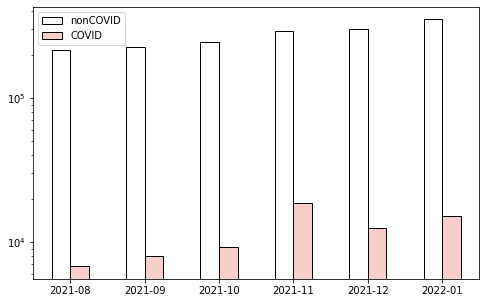

In [69]:
fig, ax = plt.subplots(1, figsize=(8, 5))
fig.set_facecolor('white')

tweets_df.groupby(['is_covid', 'month']).size().unstack('is_covid') \
    .plot.bar(
        rot=0,
        ax=ax,
        color=['#ffffff', '#f8cecc'],
        edgecolor='black',
        logy=True
    )
ax.legend(['nonCOVID', 'COVID'])
ax.set_xlabel(None)

fig.savefig('tweets-by-month.eps', dpi=320)
fig.savefig('tweets-by-month.png', dpi=320)

plt.show()

In [63]:
tweets_df.groupby(['week', 'is_covid']).size().unstack('is_covid')

is_covid,False,True
week,,
2021-30,6273,183
2021-31,45795,1277
2021-32,47922,1462
2021-33,49822,1587
2021-34,51639,1715
2021-35,52307,1817
2021-36,53768,1819
2021-37,52778,2204
2021-38,50207,1733
